<a href="https://colab.research.google.com/github/ahmedHazem2303/faceRecognition/blob/main/Teeth_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
def load_and_preprocess_data(train_dir, validation_dir, image_size, batch_size):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,

        horizontal_flip=True,
        fill_mode='nearest'
    )

    validation_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical'

    )

    validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical'

    )

    return train_generator, validation_generator


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
train_dir = '/content/drive/MyDrive/Teeth_Dataset/Training'
validation_dir = '/content/drive/MyDrive/Teeth_Dataset/Validation'
test_dir = '/content/drive/MyDrive/Teeth_Dataset/Testing'
image_size = (214, 214)
batch_size = 32
epochs = 50

train_generator, validation_generator = load_and_preprocess_data(train_dir, validation_dir, image_size, batch_size)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [18]:
history = model.fit_generator(

    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)

)

<ipython-input-18-28c59507b9bf>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
97/97 [==============================] - 338s 3s/step - loss: 0.4681 - accuracy: 0.8380 - val_loss: 0.2885 - val_accuracy: 0.8979
Epoch 2/50
97/97 [==============================] - 327s 3s/step - loss: 0.4782 - accuracy: 0.8345 - val_loss: 0.3692 - val_accuracy: 0.8804
Epoch 3/50
97/97 [==============================] - 351s 4s/step - loss: 0.5057 - accuracy: 0.8351 - val_loss: 0.2890 - val_accuracy: 0.9018
Epoch 4/50
97/97 [==============================] - 343s 4s/step - loss: 0.4564 - accuracy: 0.8477 - val_loss: 0.2951 - val_accuracy: 0.9008
Epoch 5/50
97/97 [==============================] - 327s 3s/step - loss: 0.4444 - accuracy: 0.8484 - val_loss: 0.3143 - val_accuracy: 0.9018
Epoch 6/50
97/97 [==============================] - 341s 4s/step - loss: 0.4803 - accuracy: 0.8374 - val_loss: 0.2625 - val_accuracy: 0.9086
Epoch 7/50
97/97 [==============================] - 327s 3s/step - loss: 0.4506 - accuracy: 0.8442 - val_loss: 0.3445 - val_accuracy: 0.8794
Epoch 8/50
97

KeyboardInterrupt: 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<Axes: >

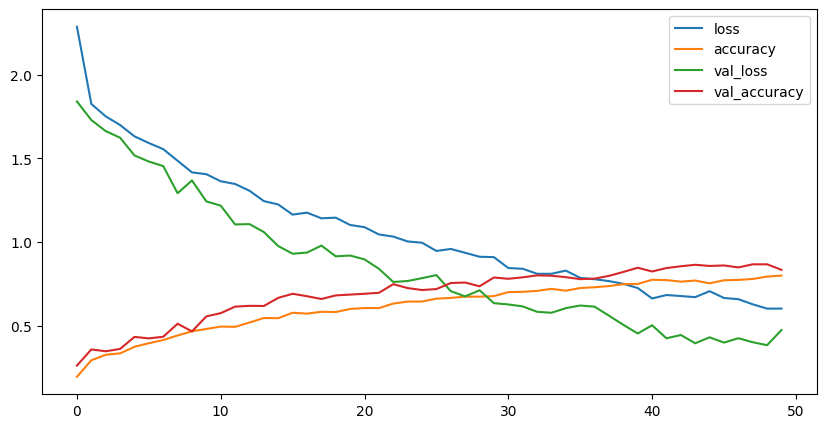

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
model.save('teeth_classification_model.h5')
loss_acc_metrics_df = pd.DataFrame(history.history)
loss_acc_metrics_df.plot(figsize=(10,5))


In [24]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        classes=["Cas","Cos","Gum","MC","OC","OLP","OT"]

    )
eval=model.evaluate(test_generator)
print(f"Test Loss: {eval[0]}, Test Accuracy: {eval[1]}")

Found 719 images belonging to 7 classes.
23/23 [==============================] - 107s 5s/step - loss: 0.2302 - accuracy: 0.9305
Test Loss: 0.23023538291454315, Test Accuracy: 0.9304589629173279
